### RGB(Multi-Channel) Task

In [20]:
import numpy as np
from tensorflow.keras.datasets import cifar100

CLASS_NAMES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

(train_images, train_targets), (test_images, test_targets) = cifar100.load_data()

print(np.unique(test_targets))
print(CLASS_NAMES)
print("train dataset shape:", train_images.shape, train_targets.shape)
print("test dataset shape:", test_images.shape, test_targets.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
['apples', 'aquariumfish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'ro

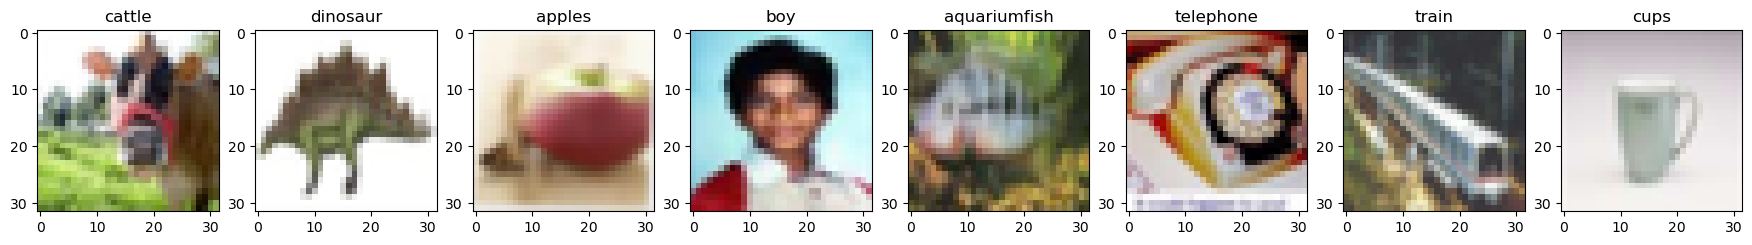

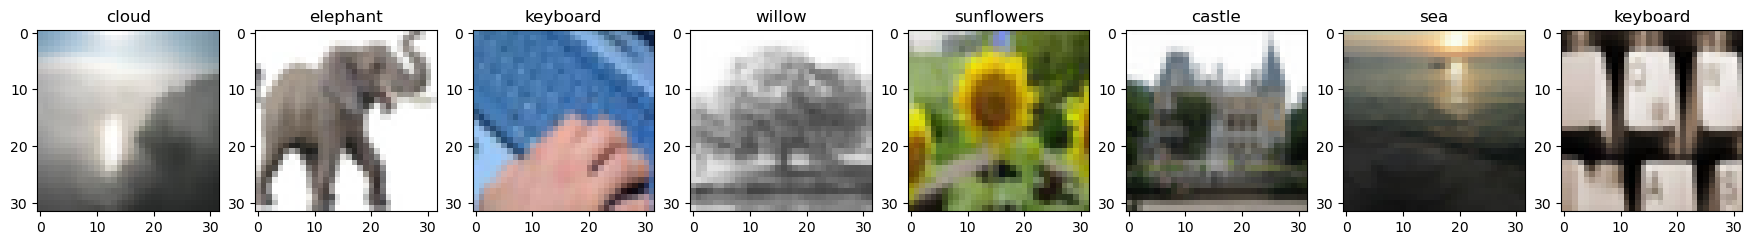

In [21]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        target = targets[i].squeeze()
        axs[i].set_title(CLASS_NAMES[int(target)])
    
show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [22]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targest = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)
    
    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)
    
    train_train_images, validation_images, train_train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)    
    
    return (train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [23]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_targets.shape, test_targets.shape)

(50000,) (10000,)


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = 32

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='input')

x = Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='valid')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='valid')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(100, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_38 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 13, 64)        36928     
                                                           

In [25]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:02d}-{val_loss:.4f}.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    patience=4,
    factor=0.1,
    mode='min',
    verbose=1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=20,
    mode='min',
    verbose=1
)

In [27]:
(train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_train_images.shape, train_train_oh_targets.shape, validation_images.shape, validation_oh_targets.shape, test_images.shape, test_oh_targets.shape)

(40000, 32, 32, 3) (40000, 100) (10000, 32, 32, 3) (10000, 100) (10000, 32, 32, 3) (10000, 100)


In [28]:
history = model.fit(x=train_train_images,  y=train_train_oh_targets, batch_size=64, epochs=10, validation_data=(validation_images, validation_oh_targets), callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 4.4460 - acc: 0.0225
Epoch 1: val_loss improved from inf to 4.14605, saving model to ./callback_files\weights.01-4.1461.h5
625/625 [==============================] - 80s 125ms/step - loss: 4.4460 - acc: 0.0225 - val_loss: 4.1461 - val_acc: 0.0457 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 4.0279 - acc: 0.0688
Epoch 2: val_loss improved from 4.14605 to 3.76774, saving model to ./callback_files\weights.02-3.7677.h5
625/625 [==============================] - 78s 126ms/step - loss: 4.0279 - acc: 0.0688 - val_loss: 3.7677 - val_acc: 0.1161 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 3.7471 - acc: 0.1214
Epoch 3: val_loss improved from 3.76774 to 3.52916, saving model to ./callback_files\weights.03-3.5292.h5
625/625 [==============================] - 78s 124ms/step - loss: 3.7471 - acc: 0.1214 - val_loss: 3.5292 - val_acc: 0.1658 - lr: 0.0010
Ep

157/157 [==============================] - 3s 22ms/step - loss: 2.8684 - acc: 0.2957


[2.8683695793151855, 0.2957000136375427]

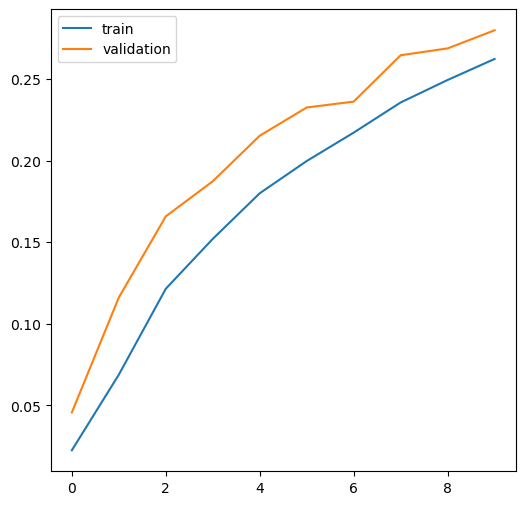

In [30]:
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

model.evaluate(test_images, test_oh_targets, batch_size=64)

In [31]:
pred_probas = model.predict(test_images[16:24], batch_size=64)
print('softmax outputs: ', pred_probas)
predicted_classes = np.argmax(pred_probas, axis=1)
print(predicted_classes)

1/1 [==============================] - 0s 155ms/step
softmax outputs:  [[7.13542774e-02 1.90595835e-02 6.58009248e-03 4.59179137e-04
  2.78782973e-05 7.77031935e-04 6.26935624e-03 3.51474015e-03
  7.87884986e-04 5.81382867e-03 5.88177657e-03 3.58348037e-03
  3.45176122e-05 2.64119531e-04 1.00903120e-02 3.74523806e-04
  4.47808160e-03 2.66359766e-05 2.00017588e-03 3.87137843e-04
  2.32790975e-04 9.46984728e-05 7.25679332e-03 1.79828450e-04
  9.72178605e-05 8.22951365e-03 3.67847434e-03 1.21932295e-04
  2.71987654e-02 4.11272980e-04 2.03002082e-06 5.49604692e-06
  3.56674218e-03 1.34488835e-03 1.90666539e-03 1.76844478e-03
  7.91791361e-03 6.50321017e-05 4.68610844e-04 2.60775583e-03
  1.19797122e-02 1.30703207e-03 2.17361579e-04 1.01948564e-03
  3.50019342e-04 1.22515550e-02 1.93915830e-03 1.56471250e-03
  1.00517482e-03 6.58254212e-05 2.02729204e-03 5.97856147e-03
  5.30669752e-07 2.32578088e-02 1.29326671e-01 1.30515371e-04
  2.64693299e-05 2.84797698e-02 9.32705516e-05 5.25714677e-05

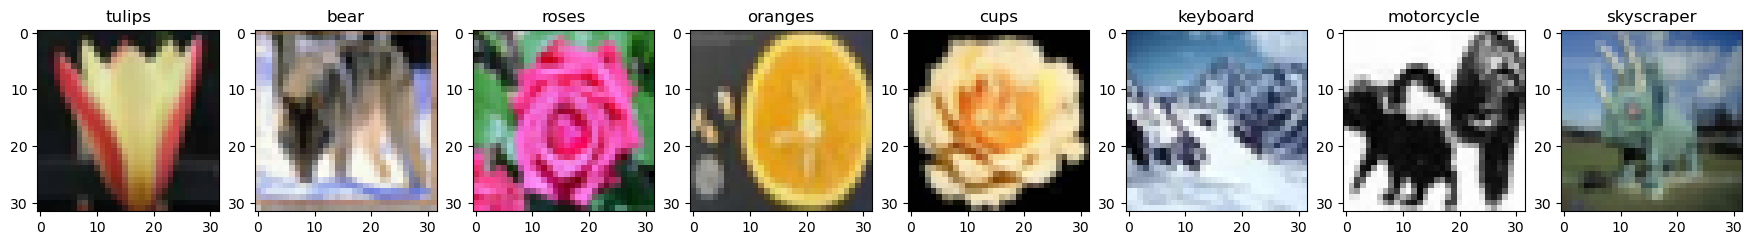

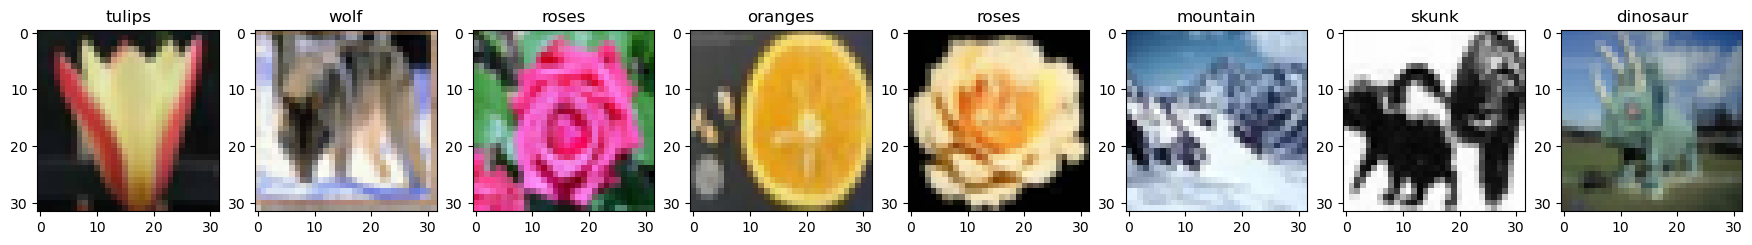

In [32]:
import matplotlib.pyplot as plt

show_images(test_images[16:24], predicted_classes[:8], ncols=8)
show_images(test_images[16:24], test_targets[16:24], ncols=8)